In [52]:
import time
import csv
import matplotlib.pyplot as plt
import numpy as np
import math
import json
import sys

# Specify the absolute path of the directory containing the .py file
directory_path = '/Users/Innomius/Andres/Personal/Canada/McGill/Lab/CottonRobot/cottonRobotRepo/Notebooks'

# Add the directory path to the sys.path list
sys.path.append(directory_path)

# Now you can import the .py file
import navigationHelpers

ModuleNotFoundError: No module named 'adafruit_rplidar'

### Main program

Suppositions about communication with arm/camera system.
<br>
<br>
System inputs:
- `start`: arm system should start looking for cotton balls and navigation system is ready to receive commands
- `stop`: arm system should pause the search for cotton balls. Navigation system won’t be listening to any commands

System outputs:
- `backward`/`forward`: move backward/forward
- `right`/`left`: move right/left
- `stop`: stop current navigation
- `finish`: cotton ball collection finished, main navigation can continue

Camera is expected to always stop a navigation started by it. For example if the camera told the navigation system to move `forward`, navigation will continue indefinitely until a `stop` command is received. If this is a problem, we can make the navigation work with timeouts.
<br>
Another thing that shouldn’t happen is for the arm system to send a `finish` command after a navigation command. For example send `forward` and then `finish`. The `stop` command is expected to always come before the `finish` command.


In [38]:
def getLidarData():
    return

def getPolarProjection(a, b):
    #Get projection of a onto b
    r1, theta1 = a
    r2, theta2 = b

    # Calculate the dot product
    dotProduct = r1 * r2 * math.cos((theta1 - theta2)*math.pi/180)

    return abs(dotProduct/r2)

def findWallPoints(direction, thetaRange, polarData, sigmas = 2):
    #direction common values
    #0   (sud)
    #90  (east)
    #180 (nord)
    #270 (west)
    
    theta1 = direction - thetaRange
    theta2 = direction + thetaRange
    
    #Select all points in the specified direction
    if theta1 < 0:
        theta1 = theta1 % 360
        wallPoints = polarData[(polarData[:, 1] >= theta1) | (polarData[:, 1] <= theta2)]
    else:
        wallPoints = polarData[(polarData[:, 1] >= theta1) & (polarData[:, 1] <= theta2)]
        
    #Filter noise based on distance in specified direction
    d = np.zeros(wallPoints.shape[0])
    for i,point in enumerate(wallPoints):
        d[i] = getPolarProjection(point, [1,direction])

    # Calculate the mean and standard deviation of projections
    mean = np.mean(d)
    std = np.std(d)

    # Create a boolean mask for elements within the specified range
    mask = np.abs(d - mean) <= sigmas * std

    # Get the indices of the elements that satisfy the mask
    indices = np.where(mask)[0]

    return wallPoints[indices]

def getDistanceFromWall(direction, thetaRange, polarData, sigmas = 2):
    #direction common values
    #0   (sud)
    #90  (east)
    #180 (nord)
    #270 (west)
    
    wallPoints = findWallPoints(direction, thetaRange, polarData, sigmas)
    return findWallPoints(direction, thetaRange, polarData, sigmas)[np.argmin(np.abs(wallPoints[:,1] - direction))][0]

def navigateUsingWall(wallDirection, targetDistance):
    distance = 20
    currentDistance = getDistanceFromWall(distance, wallDirection)
    
    # 1 implies move closer to wall, -1 implies move away from the wall
    navDirection = int(math.copysign(1,currentDistance - targetDistance))
    
    print(f"starting navigation in direction: {navDirection}")
    
    while abs(currentDistance - targetDistance) > 1:
        print(f"current ditance to wall: {currentDistance}")
        distance = distance - navDirection
        currentDistance = getDistanceFromWall(distance, wallDirection, thetaRange = 3)
    
    print("navigation ended")

In [44]:
cyclesInfo = [
    {
        "name": "cycle 0",
        "mainNavDirection": 270,
        "endOfCycleDistance": 0.20,
        "finalPoint": [
            {
                # horizontal navigation
                "name": "start point horizontal navigation",
                "lidarDirection": 270,
                "targetDistance": 0.15
            },
            {
                # vertical navigation
                "name": "start point vertical navigation",
                "lidarDirection": 0,
                "targetDistance": 0.40
            }
        ]
    },
    {
        "name": "cycle 1",
        "mainNavDirection": 90,
        "endOfCycleDistance": 0.20,
        "finalPoint": [
            {
                # horizontal navigation
                "name": "start point horizontal navigation",
                "lidarDirection": 90,
                "targetDistance": 0.10
            },
            {
                # vertical navigation
                "name": "start point vertical navigation",
                "lidarDirection": 0,
                "targetDistance": 0.40
            },
        ],
    },
    {
        "name": "cycle 2",
        "mainNavDirection": 270,
        "endOfCycleDistance": 0.20,
        "finalPoint": [
            {
                # horizontal navigation
                "name": "start point horizontal navigation",
                "lidarDirection": 270,
                "targetDistance": 0.10
            },
            {
                # vertical navigation
                "name": "start point vertical navigation",
                "lidarDirection": 180,
                "targetDistance": 0.40
            },
        ],
    },
    {
        "name": "cycle 3",
        "mainNavDirection": 90,
        "endOfCycleDistance": 0.20,
        "finalPoint": [
            {
                # horizontal navigation
                "name": "start point horizontal navigation",
                "lidarDirection": 90,
                "targetDistance": 0.10
            },
            {
                # vertical navigation
                "name": "start point vertical navigation",
                "lidarDirection": 180,
                "targetDistance": 0.40
            },
        ],
    },
    {
        "name": "cycle 4",
        "mainNavDirection": 270,
        "endOfCycleDistance": 0.20,
        "finalPoint": [
            {
                # horizontal navigation
                "name": "start point horizontal navigation",
                "lidarDirection": 270,
                "targetDistance": 0.10
            },
            {
                # vertical navigation
                "name": "start point vertical navigation",
                "lidarDirection": 180,
                "targetDistance": 0.10
            },
        ],
    },
    {
        "name": "cycle 5",
        "mainNavDirection": 90,
        "endOfCycleDistance": 0.20,
        "finalPoint": [
            {
                # horizontal navigation
                "name": "start point horizontal navigation",
                "lidarDirection": 90,
                "targetDistance": 0.10
            },
            {
                # vertical navigation
                "name": "start point vertical navigation",
                "lidarDirection": 180,
                "targetDistance": 0.10
            },
        ],
    },
    
]

In [47]:
def sudoPublishLidarData(lidarData):
    # json.dumps(a.tolist())
    return

def sudoPublishNavigationCommand(command):
    print(command)
    return

def setOrientationUsingWall(direction):
    print(f"Setting orientation using {direction} direction")
    return

def navigationCommand(command, magnitude, timeOut=-1):
    if timeOut>0:
        sudoCommand(f"{command};{magnitude}")
        print(f"/nStarting timed out navigation: ({command}, {timeOut})")
        time.sleep(timeOut)
        sudoCommand('stop;0')
    else:
        sudoCommand(f"{command};{magnitude}")
        print(f"/nStarting indefinitely navigation: {command}")
    return

def navigateUsingWall(wallDirection, targetDistance):
    
    lidarData = getLidarData()
    currentDistance = getDistanceFromWall(wallDirection, 2, lidarData)
    
    # 1 implies move closer to wall, -1 implies move away from the wall
    navDirection = int(math.copysign(1,currentDistance - targetDistance))
    
    if wallDirection==0:
        if navDirection>0:
            navigationCommand('backward', 0.1)
        else:
            navigationCommand('forward', 0.1)
    elif wallDirection==180:
        if navDirection>0:
            navigationCommand('forward', 0.1)
        else:
            navigationCommand('backward', 0.1)
    elif wallDirection==90:
        if navDirection>0:
            navigationCommand('right', 0.1)
        else:
            navigationCommand('left', 0.1)
    elif wallDirection==270:
        if navDirection>0:
            navigationCommand('left', 0.1)
        else:
            navigationCommand('right', 0.1)
    
    print(f"starting navigation in direction: {navDirection}")
    
    while abs(currentDistance - targetDistance) > 1:
        print(f"current ditance to wall: {currentDistance}")
        lidarData = getLidarData()
        currentDistance = getDistanceFromWall(wallDirection, 2, lidarData)
    
    navigationCommand('stop', 0)
    print("navigation ended")

def isEndOfCycle(lidarData, wallDirection, threshold):
    '''
    This method process lidar data and returns True when the distance of the lidar and the wall (in the specified direction)
    is smaller than the specified threshold
    '''
    distanceFromWall = getDistanceFromWall(wallDirection, 2, lidarData)
    if distanceFromWall<=threshold:
        return True
    return False
    
def start(cyclesInfo):
    
    for cycleInfo in cyclesInfo:
        # set variables used during the cycle
        endOfCycle = False
        
        if cycleInfo['mainNavDirection'] ==90:
            mainNavCommand = 'right'
        else:
            mainNavCommand = 'left'

        #Start navigation
        navigationCommand(mainNavCommand, 0.1)
        
        while (not endOfCycle):                
            # Check end of cycle
            lidarData = getLidarData()
            endOfCycle = isEndOfCycle(lidarData, cycleInfo['mainNavDirection'], cycleInfo['endOfCycleDistance'])
            
        navigationCommand("stop", 0)
        
        time.sleep(1)
        
        # Horizontal Navigation
        navigateUsingWall(cycleInfo['finalPoint'][0]['lidarDirection'], cycleInfo['finalPoint'][0]['targetDistance'])
        
        time.sleep(1)
        
        # Vertical Navigation
        navigateUsingWall(cycleInfo['finalPoint'][1]['lidarDirection'], cycleInfo['finalPoint'][1]['targetDistance'])

In [48]:
allCyclesFinished = True

while True:
    
    if not allCyclesFinished:
        start(cyclesInfo)
        
    print('navigation ended')
    time.sleep(10)

navigation ended
navigation ended


KeyboardInterrupt: 

### Example to get distance from walls

0


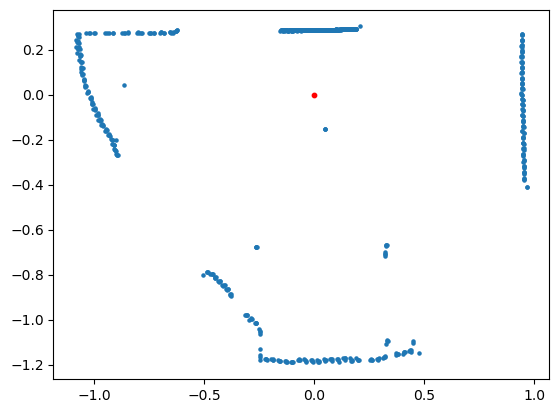

In [33]:
fileName = '../../TestData/29-june/final/raw/G.csv'

lidarData = []
maxDistance = 1
minDistance = 0.15
                
# with open(fileName, 'r') as file: 
#     csvReader = csv.reader(file)
    
#     for row in csvReader:
#         r = float(row[1])/1000
#         theta = float(row[0])
#         if (minDistance < r < maxDistance):
#             lidarData.append([theta,r])
    
# lidarData = np.array(lidarData)

lidarData = navigationHelpers.getLidarData(fileName, maxDistance=5)

#get cartesian coordinates
extraTheta = 0
x = -lidarData[:,0]*np.cos((lidarData[:,1]+ extraTheta)*math.pi/180)
y = -lidarData[:,0]*np.sin((lidarData[:,1]+ extraTheta)*math.pi/180)

#plot
plt.scatter(x, y, s=5)
plt.scatter([0],[0], s=10, color='red')

In [42]:
getDistanceFromWall(0, 3, lidarData)

1.0135